In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt

**Data Collection and Processing**


In [2]:
#loading car_purchasing.csv dataset
df = pd.read_csv("car_purchasing.csv", encoding='latin1')
df

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248
...,...,...,...,...,...,...,...,...,...
495,Walter,ligula@Cumsociis.ca,Nepal,0,41.462515,71942.40291,6995.902524,541670.1016,48901.44342
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,Zimbabwe,1,37.642000,56039.49793,12301.456790,360419.0988,31491.41457
497,Pearl,penatibus.et@massanonante.com,Philippines,1,53.943497,68888.77805,10611.606860,764531.3203,64147.28888
498,Nell,Quisque.varius@arcuVivamussit.net,Botswana,1,59.160509,49811.99062,14013.034510,337826.6382,45442.15353


**Inspecting The Data**

In [3]:
df.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [4]:
df.tail()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
495,Walter,ligula@Cumsociis.ca,Nepal,0,41.462515,71942.40291,6995.902524,541670.1016,48901.44342
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,Zimbabwe,1,37.642000,56039.49793,12301.456790,360419.0988,31491.41457
497,Pearl,penatibus.et@massanonante.com,Philippines,1,53.943497,68888.77805,10611.606860,764531.3203,64147.28888
498,Nell,Quisque.varius@arcuVivamussit.net,Botswana,1,59.160509,49811.99062,14013.034510,337826.6382,45442.15353
499,Marla,Camaron.marla@hotmail.com,marlal,1,46.731152,61370.67766,9391.341628,462946.4924,45107.22566


In [5]:
df.shape

(500, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer name        500 non-null    object 
 1   customer e-mail      500 non-null    object 
 2   country              500 non-null    object 
 3   gender               500 non-null    int64  
 4   age                  500 non-null    float64
 5   annual Salary        500 non-null    float64
 6   credit card debt     500 non-null    float64
 7   net worth            500 non-null    float64
 8   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


In [7]:
df.describe()

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.241674,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.978862,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,40.949969,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.049901,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,51.612263,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


In [8]:
#Checking for null values in the dataset
df.isnull().sum()

customer name          0
customer e-mail        0
country                0
gender                 0
age                    0
annual Salary          0
credit card debt       0
net worth              0
car purchase amount    0
dtype: int64

In [9]:
# Calculate the IQR for each numerical column
numerical_columns=["gender","age","annual Salary","credit card debt","net worth","car purchase amount"]
outliers = {}
for column in numerical_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[column] = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
# Display the IQR for each numerical column
outliers

{'gender': Empty DataFrame
 Columns: [customer name, customer e-mail, country, gender, age, annual Salary, credit card debt, net worth, car purchase amount]
 Index: [],
 'age':       customer name                          customer e-mail  \
 37   Uriel Bradshaw              ultrices@Integersemelit.com   
 194     Gil Sanders                 eu.ultrices@cursuset.net   
 236  Tate C. Foster            dignissim.magna@Maurisvel.edu   
 444          Camden  Aliquam.adipiscing.lobortis@loremut.net   
 
                  country  gender        age  annual Salary  credit card debt  \
 37                Turkey       1  22.000387    43131.78411      10917.140940   
 194                Haiti       0  70.000000    52323.24480      12438.856480   
 236             Viet Nam       1  69.569306    41434.51258       6810.555606   
 444  Congo (Brazzaville)       1  20.000000    70467.29492        100.000000   
 
        net worth  car purchase amount  
 37   326742.7352          10092.22509  
 194  34

In [10]:
df.columns

Index(['customer name', 'customer e-mail', 'country', 'gender', 'age',
       'annual Salary', 'credit card debt', 'net worth',
       'car purchase amount'],
      dtype='object')

In [11]:
print(df.country.value_counts())
print(df.gender.value_counts())

country
Israel                 6
Mauritania             6
Bolivia                6
Greenland              5
Saint Barthélemy       5
                      ..
El Salvador            1
Denmark                1
Oman                   1
Trinidad and Tobago    1
marlal                 1
Name: count, Length: 211, dtype: int64
gender
1    253
0    247
Name: count, dtype: int64


In [12]:
df.drop(columns=['customer name','customer e-mail','country'], inplace=True)

In [13]:
df.head()

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [14]:
df['age'] = df['age'].astype('int64')
df['annual Salary'] = df['annual Salary'].round(2)
df['credit card debt'] = df['credit card debt'].round(2)
df['net worth'] = df['net worth'].round(2)
df['car purchase amount'] = df['car purchase amount'].round(2)

In [15]:
df

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,0,41,62812.09,11609.38,238961.25,35321.46
1,0,40,66646.89,9572.96,530973.91,45115.53
2,1,43,53798.55,11160.36,638467.18,42925.71
3,1,58,79370.04,14426.16,548599.05,67422.36
4,1,57,59729.15,5358.71,560304.07,55915.46
...,...,...,...,...,...,...
495,0,41,71942.40,6995.90,541670.10,48901.44
496,1,37,56039.50,12301.46,360419.10,31491.41
497,1,53,68888.78,10611.61,764531.32,64147.29
498,1,59,49811.99,14013.03,337826.64,45442.15


In [16]:
# Removing outliers from the dataset
for column in numerical_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

df.reset_index(drop=True, inplace=True)
df

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,0,41,62812.09,11609.38,238961.25,35321.46
1,0,40,66646.89,9572.96,530973.91,45115.53
2,1,43,53798.55,11160.36,638467.18,42925.71
3,1,58,79370.04,14426.16,548599.05,67422.36
4,1,57,59729.15,5358.71,560304.07,55915.46
...,...,...,...,...,...,...
478,0,41,71942.40,6995.90,541670.10,48901.44
479,1,37,56039.50,12301.46,360419.10,31491.41
480,1,53,68888.78,10611.61,764531.32,64147.29
481,1,59,49811.99,14013.03,337826.64,45442.15


**Spliting the data into training data and test data**

In [17]:
x=df.drop('car purchase amount', axis=1)
y=df['car purchase amount']

In [18]:
x

,gender,age,annual Salary,credit card debt,net worth
0,0,41,62812.09,11609.38,238961.25
1,0,40,66646.89,9572.96,530973.91
2,1,43,53798.55,11160.36,638467.18
3,1,58,79370.04,14426.16,548599.05
4,1,57,59729.15,5358.71,560304.07
...,...,...,...,...,...
478,0,41,71942.40,6995.90,541670.10
479,1,37,56039.50,12301.46,360419.10
480,1,53,68888.78,10611.61,764531.32
481,1,59,49811.99,14013.03,337826.64


In [19]:
y


0      35321.46
1      45115.53
2      42925.71
3      67422.36
4      55915.46
         ...   
478    48901.44
479    31491.41
480    64147.29
481    45442.15
482    45107.23
Name: car purchase amount, Length: 483, dtype: float64

**Splitting Training and testing Data**

In [20]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((386, 5), (97, 5), (386,), (97,))

**Model Training**

1.Linear Regression

In [21]:
#loading the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

**Model Evaluation**

In [22]:
# prediction on training data
training_data_prediction = model.predict(X_train)

In [23]:
# R squared error
error_score= metrics.r2_score(y_train, training_data_prediction)
print("R squared error: ", error_score)

R squared error:  0.9994926284442135


**Visualize the actual prices with predicted values**

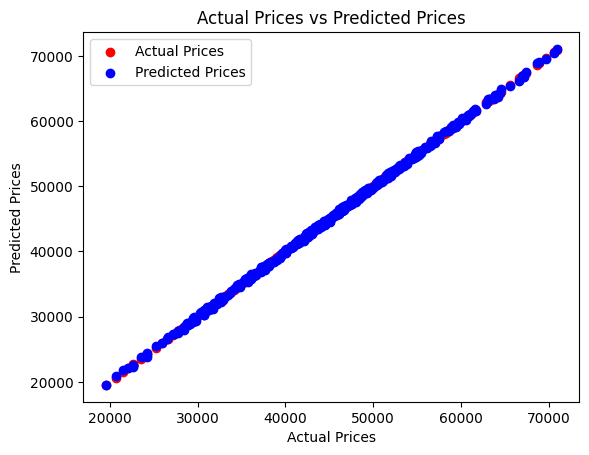

In [24]:
plt.scatter(y_train, y_train, color='red', label='Actual Prices')
plt.scatter(y_train, training_data_prediction, color='blue', label='Predicted Prices')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.legend()
plt.show()

In [25]:
# prediction on testing data
test_data_prediction = model.predict(X_test)

In [26]:
# R squared error
t_error_score= metrics.r2_score(y_test, test_data_prediction)
print("R squared error: ", t_error_score)

R squared error:  0.9992326497208435


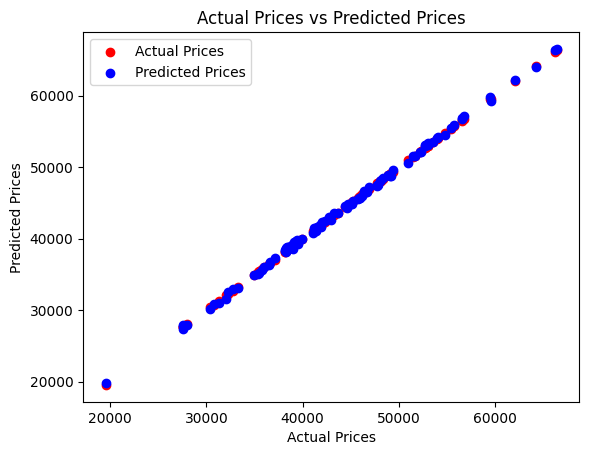

In [27]:
plt.scatter(y_test, y_test, color='red', label='Actual Prices')
plt.scatter(y_test, test_data_prediction, color='blue', label='Predicted Prices')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.legend()
plt.show()